### Challenge 06 - Store Sales: Time Series Forecasting


- Perform exploratory data analysis
- Build a solid baseline model
- Tune models using validation strategies
- Incorporate time-series features
- Make final predictions for submission

In [14]:
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv('../data/store-sales-time-series-forecasting/train.csv')

In [16]:
df.head(20)

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0
5,5,2013-01-01,1,BREAD/BAKERY,0.0,0
6,6,2013-01-01,1,CELEBRATION,0.0,0
7,7,2013-01-01,1,CLEANING,0.0,0
8,8,2013-01-01,1,DAIRY,0.0,0
9,9,2013-01-01,1,DELI,0.0,0


In [17]:
df.isnull().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [18]:
df['date'] = pd.to_datetime(df['date'])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 137.4+ MB


In [20]:
print(df['date'].min(), df['date'].max())

2013-01-01 00:00:00 2017-08-15 00:00:00


### Daily sales

<Axes: title={'center': 'Total Sales Over Time'}, xlabel='date'>

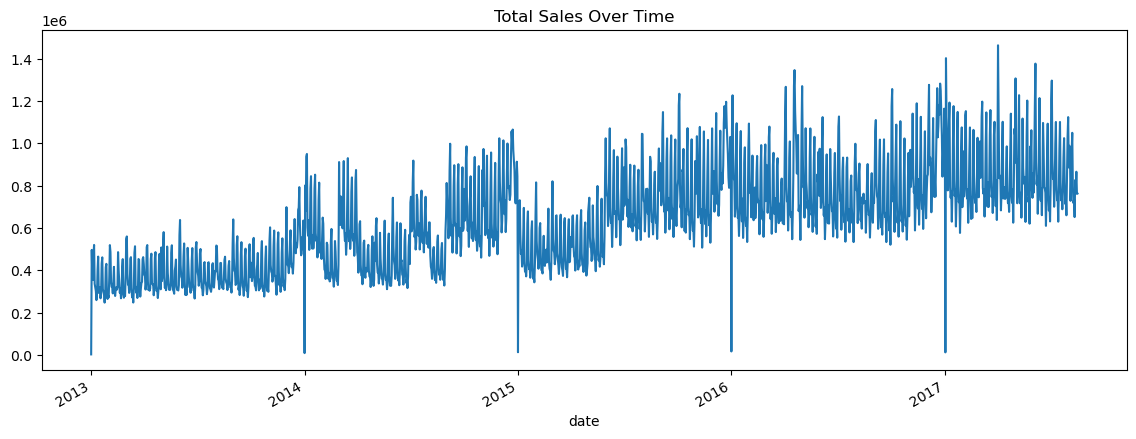

In [22]:
daily_sales = df.groupby('date')['sales'].sum()
daily_sales.plot(figsize=(14, 5), title='Total Sales Over Time')

<Axes: title={'center': 'Average Sales by Day of Year'}, xlabel='day_month'>

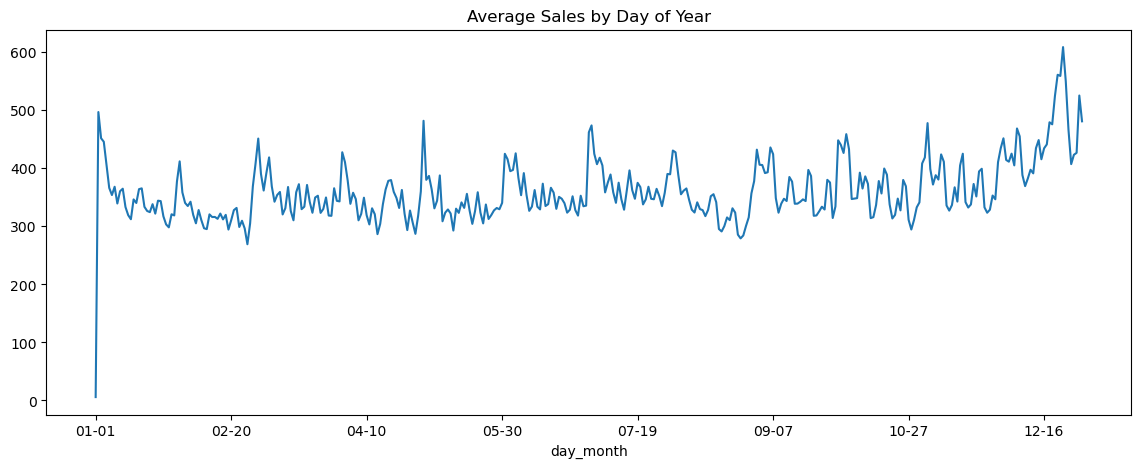

In [25]:
df['day_month'] = df['date'].dt.strftime('%m-%d')
pivot = df.groupby(['day_month'])['sales'].mean()
pivot.plot(figsize=(14,5), title='Average Sales by Day of Year')

<Axes: xlabel='date'>

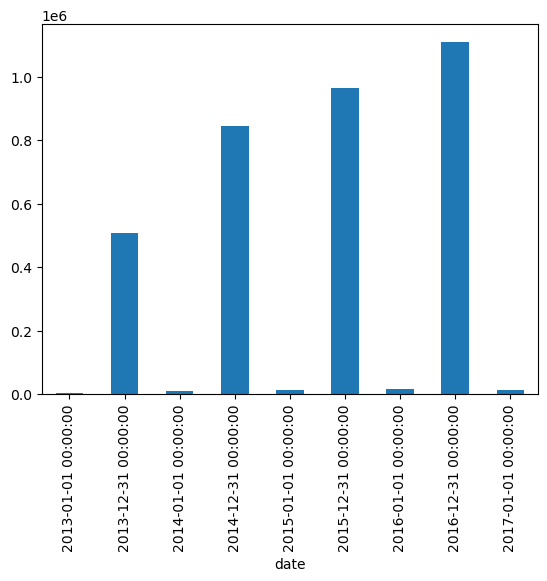

In [26]:
df[df['date'].dt.strftime('%m-%d').isin(['12-31', '01-01'])].groupby('date')['sales'].sum().plot(kind='bar')


### Sales per product family

<Axes: title={'center': 'Daily Sales per Product Family'}, xlabel='date'>

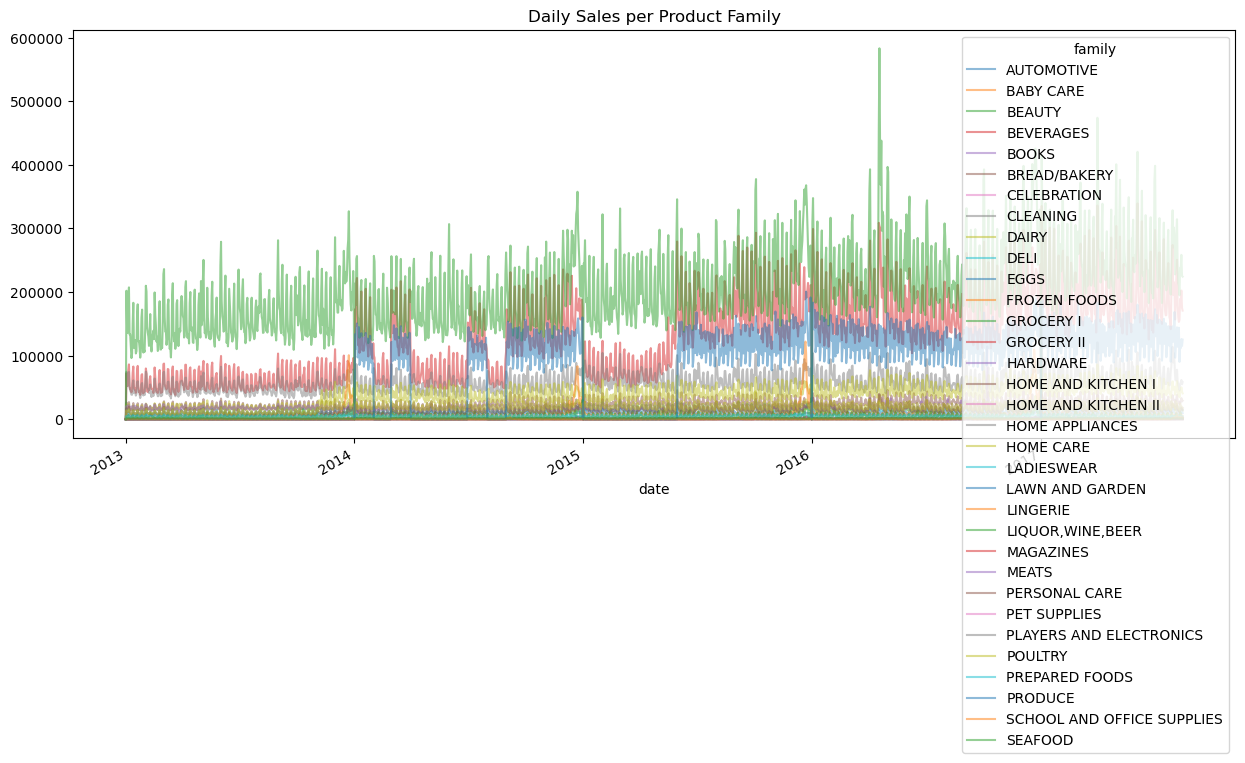

In [29]:
family_sales = df.groupby(['date', 'family'])['sales'].sum().unstack()
family_sales.plot(figsize=(15, 6), alpha=0.5, title='Daily Sales per Product Family')